In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Dataset : MAGIC Gamma Telescope
Link : https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope

In [3]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv('magic04.data',names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [5]:
#df['class']=(df['class']=="g").astype(int) you can also try like this
df['class']=df['class'].apply(lambda x: 1 if x=='g' else 0)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


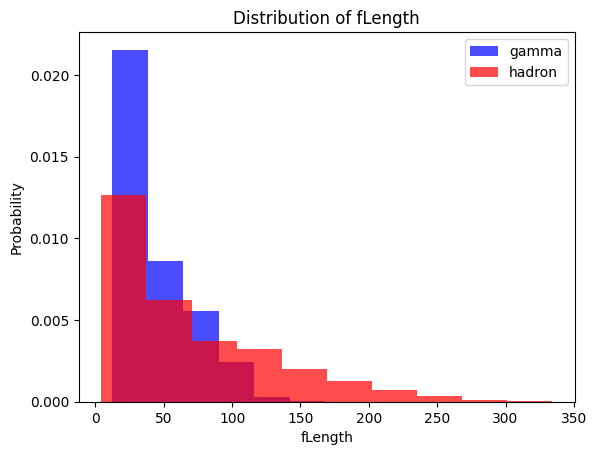

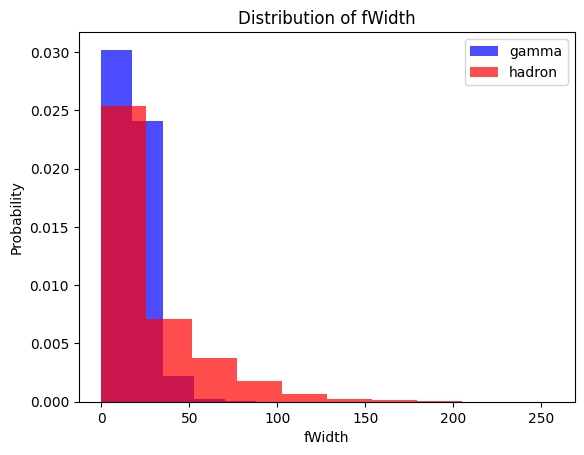

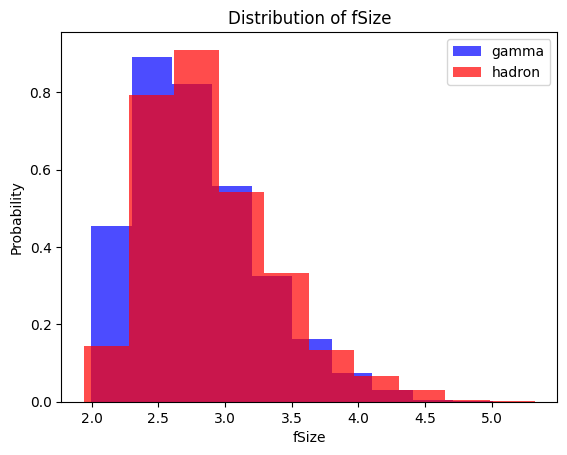

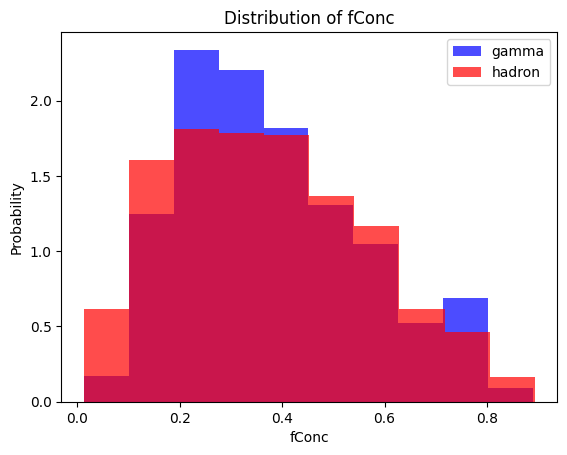

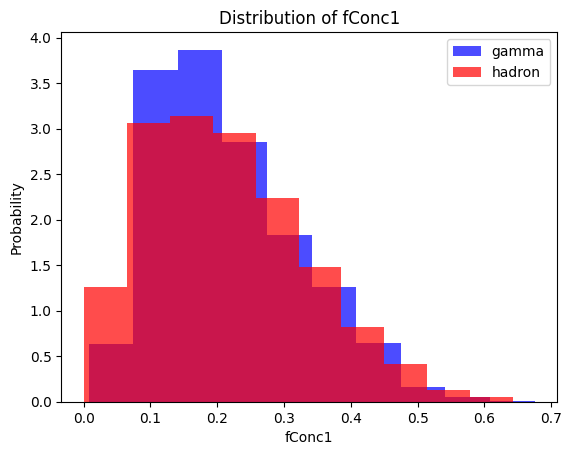

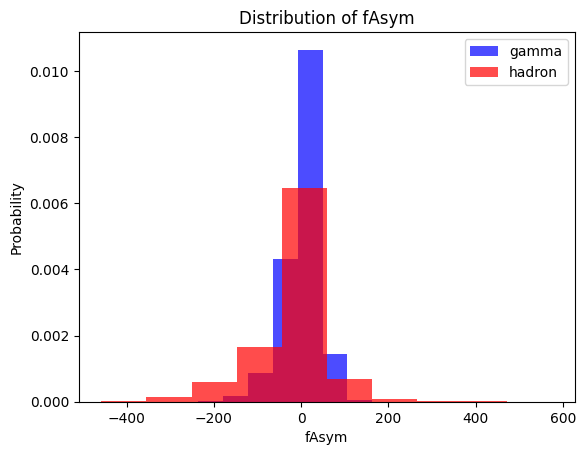

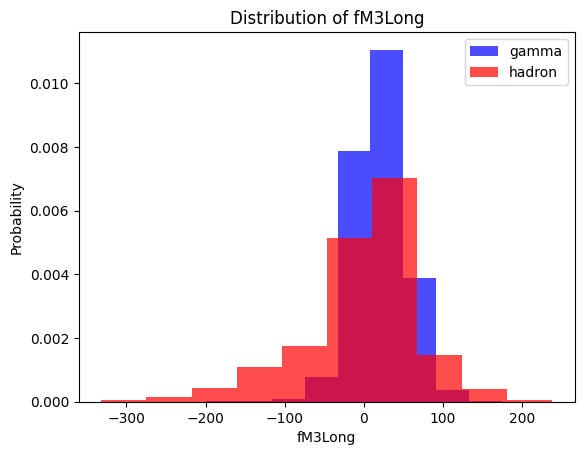

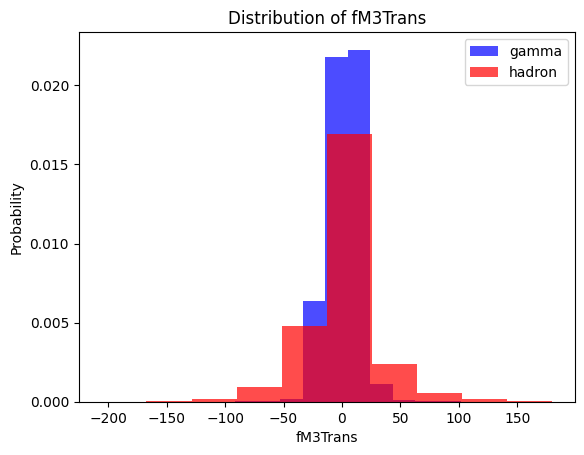

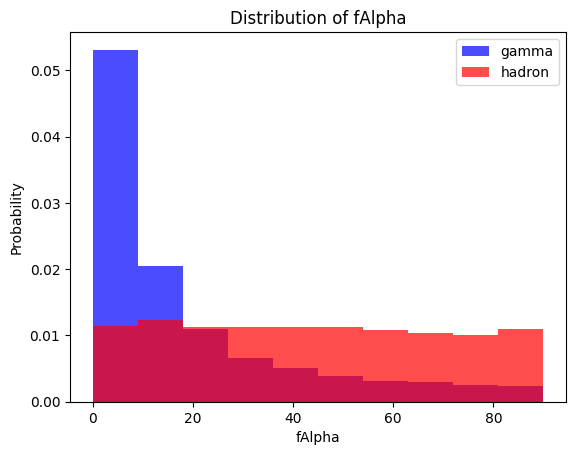

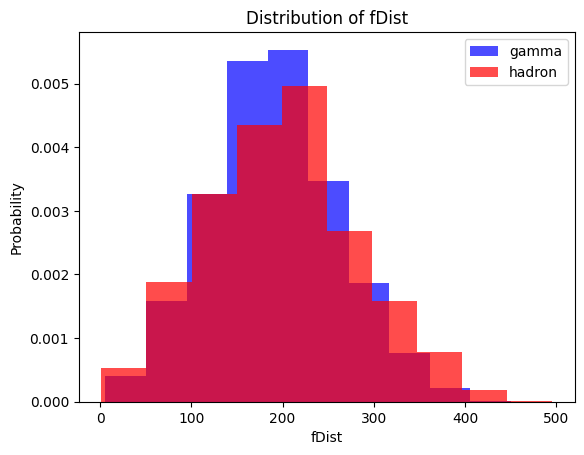

In [6]:
for label in cols[:-1]:  # Use slicing
    plt.hist(df[df['class'] == 1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df['class'] == 0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(f'Distribution of {label}')
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

#Train, Validation, Test Datasets

In [7]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
def scale_dataset(dataframe,oversample=False):
    X=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values
    scaler=StandardScaler()
    x=scaler.fit_transform(X)

    if oversample:
        ros=RandomOverSampler()
        X,y=ros.fit_resample(X,y)
    data=np.hstack((X,np.reshape(y,(-1,1))))
    return data,X,y

In [9]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
9886,68.8179,24.1383,3.1422,0.1903,0.1027,70.5787,-34.3792,18.0536,3.4460,250.754,1
11142,33.3991,8.0634,2.3212,0.5107,0.3031,2.2708,-14.5768,-1.9102,0.0390,212.271,1
5634,85.0313,30.1529,3.0624,0.2252,0.1174,-48.2222,-15.4541,-18.0819,1.7685,336.706,1
524,25.3012,16.2202,2.5682,0.5568,0.3149,-17.2506,-27.2580,-14.7233,48.5567,228.125,1
7410,101.3480,31.8718,3.4574,0.2190,0.1209,-69.8804,46.7859,-17.4249,4.9290,326.700,1
...,...,...,...,...,...,...,...,...,...,...,...
8298,75.5072,25.9940,3.4212,0.2457,0.1598,-48.7551,74.3902,15.5433,4.0960,291.434,1
16868,60.4391,49.7525,3.1466,0.2269,0.1159,-33.0100,-60.5389,-31.5351,87.5028,216.221,0
6719,54.0026,15.4637,2.9143,0.2814,0.1456,37.5092,46.7648,-12.9942,0.3660,283.038,1
3472,12.9604,11.2107,2.1569,0.7456,0.4216,-14.7113,6.7743,10.7389,28.2782,223.592,1


In [10]:
print(len(train[train['class']==1])) #gamma
print(len(train[train['class']==0]))  #hadron

7349
4063


In [11]:
train,X_train,y_train=scale_dataset(train,oversample=True)
valid,X_valid,y_valid=scale_dataset(valid,oversample=False)
test,X_test,y_test=scale_dataset(test,oversample=False)

#KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [46]:
 knn_model  =KNeighborsClassifier(n_neighbors=5)
 knn_model.fit(X_train,y_train)


KNeighborsClassifier()

In [47]:
 y_pred=knn_model.predict(X_test)

In [48]:
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [49]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1341
           1       0.83      0.83      0.83      2463

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804

[[ 934  407]
 [ 414 2049]]
0.7841745531019979


#Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [59]:
 y_pred=nb_model.predict(X_test)

In [55]:
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [56]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.39      0.49      1341
           1       0.73      0.88      0.80      2463

    accuracy                           0.71      3804
   macro avg       0.69      0.64      0.64      3804
weighted avg       0.70      0.71      0.69      3804

[[ 522  819]
 [ 284 2179]]
0.7100420609884333


#Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lg_model=LogisticRegression()
lg_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
 y_pred=lg_model.predict(X_test)

In [61]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1341
           1       0.83      0.82      0.83      2463

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804

[[ 936  405]
 [ 435 2028]]
0.7791798107255521


#Support Vector Machines (SVM)

In [63]:
from sklearn.svm import SVC

In [64]:
svm_model=SVC()
svm_model.fit(X_train,y_train)

SVC()

In [65]:
 y_pred=svm_model.predict(X_test)

In [66]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1341
           1       0.85      0.87      0.86      2463

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804

[[ 962  379]
 [ 328 2135]]
0.814143007360673


#Neural Network Model

In [12]:
import tensorflow as tf

In [15]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model=tf.keras.Sequential([

      tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history = nn_model.fit(X_train, y_train,
                       epochs=epochs,
                       batch_size=batch_size,
                       validation_data=(X_valid, y_valid),
                       verbose=0)

  return nn_model,history


In [16]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    """Plots the training and validation loss curves."""
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    """Plots the training and validation accuracy curves."""
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()  # Adjust subplots to fit in the figure area
    plt.show()



num_nodes:16,dropout_prob:0,lr:0.01,batch_size:32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


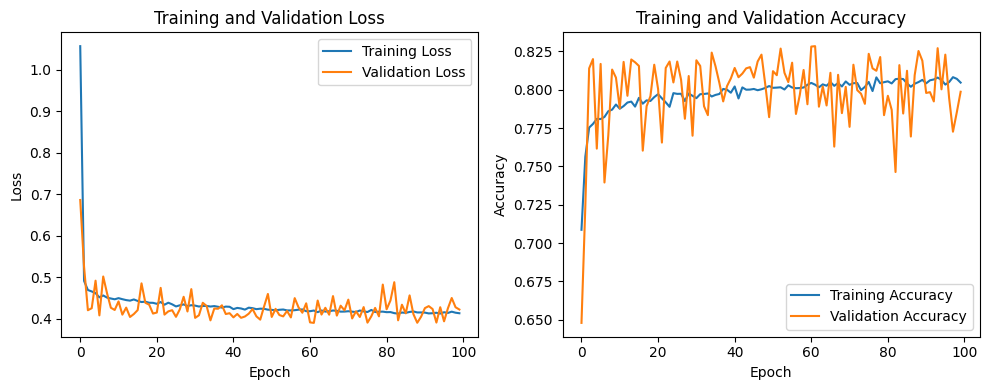

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7999 - loss: 0.4218
num_nodes:16,dropout_prob:0,lr:0.01,batch_size:64


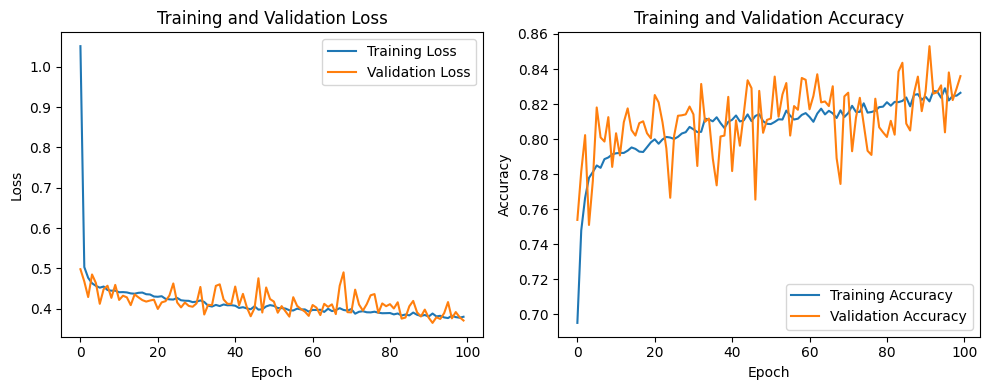

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8300 - loss: 0.3731
num_nodes:16,dropout_prob:0,lr:0.01,batch_size:128


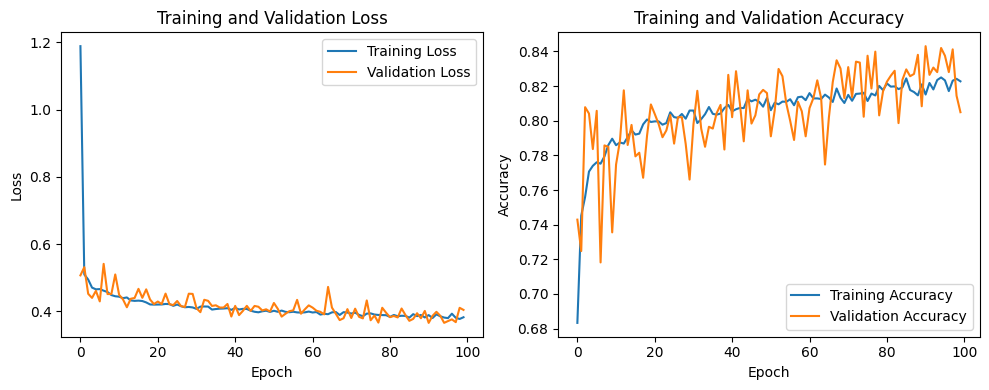

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.4060
num_nodes:16,dropout_prob:0,lr:0.005,batch_size:32


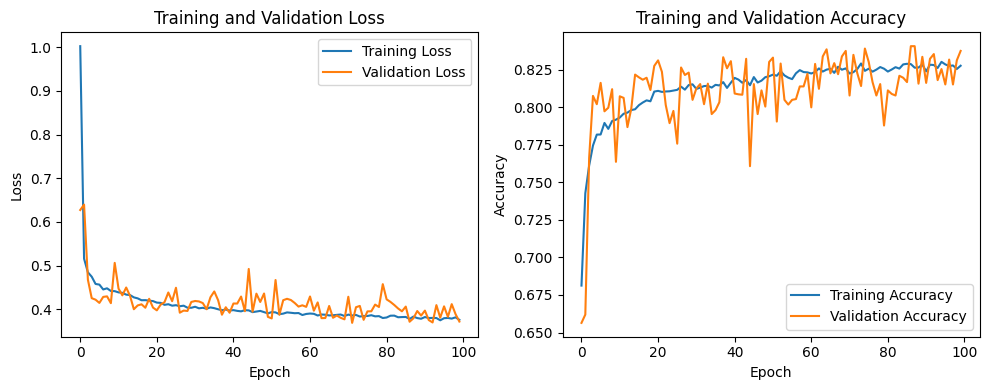

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8386 - loss: 0.3666
num_nodes:16,dropout_prob:0,lr:0.005,batch_size:64


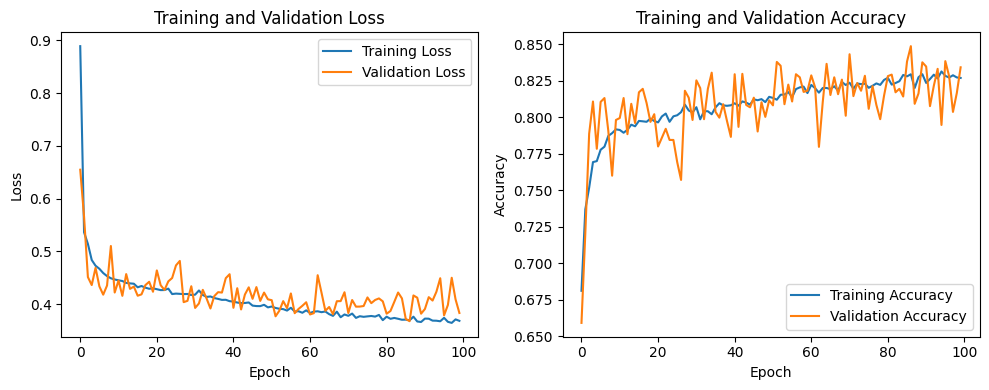

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8347 - loss: 0.3876
num_nodes:16,dropout_prob:0,lr:0.005,batch_size:128


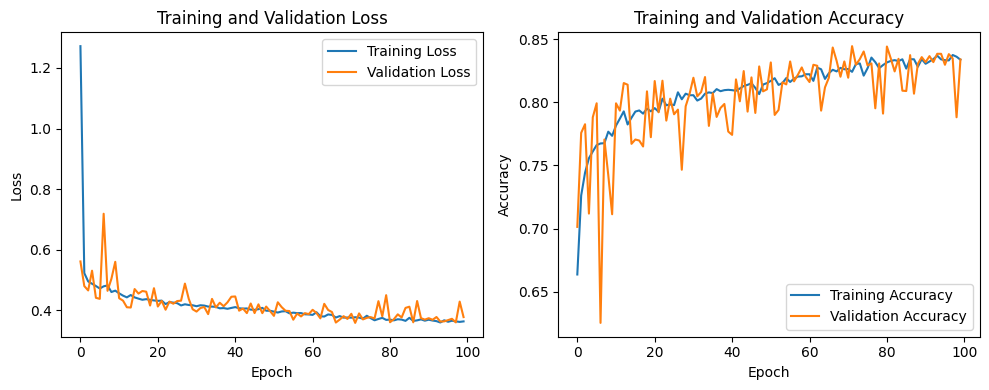

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8318 - loss: 0.3750
num_nodes:16,dropout_prob:0,lr:0.001,batch_size:32


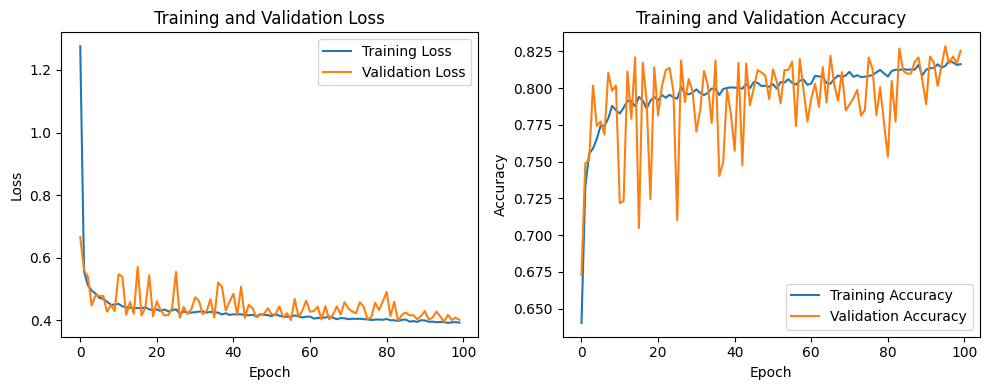

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8298 - loss: 0.3934
num_nodes:16,dropout_prob:0,lr:0.001,batch_size:64


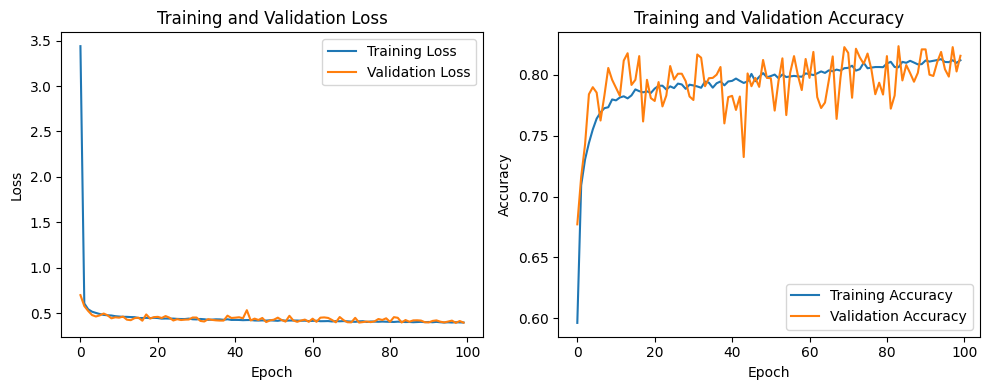

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8187 - loss: 0.3871
num_nodes:16,dropout_prob:0,lr:0.001,batch_size:128


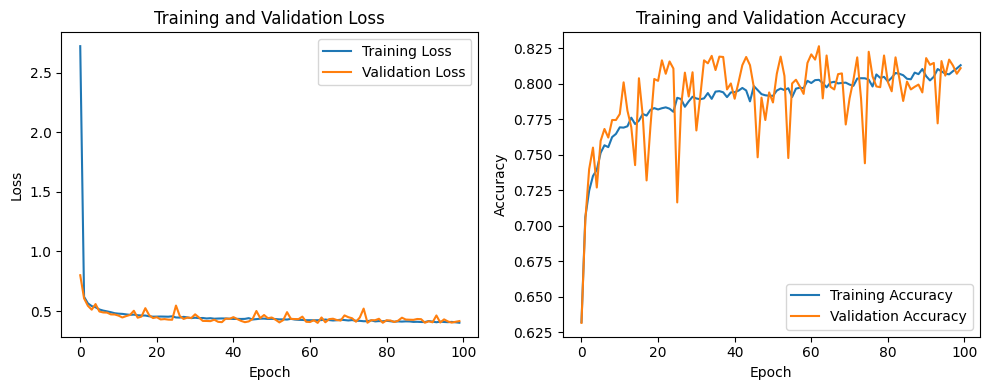

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8172 - loss: 0.4118
num_nodes:16,dropout_prob:0.2,lr:0.01,batch_size:32


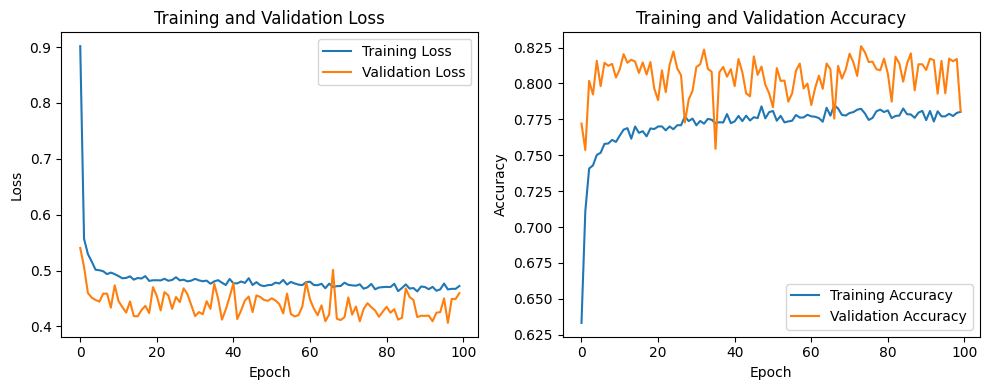

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7806 - loss: 0.4593
num_nodes:16,dropout_prob:0.2,lr:0.01,batch_size:64


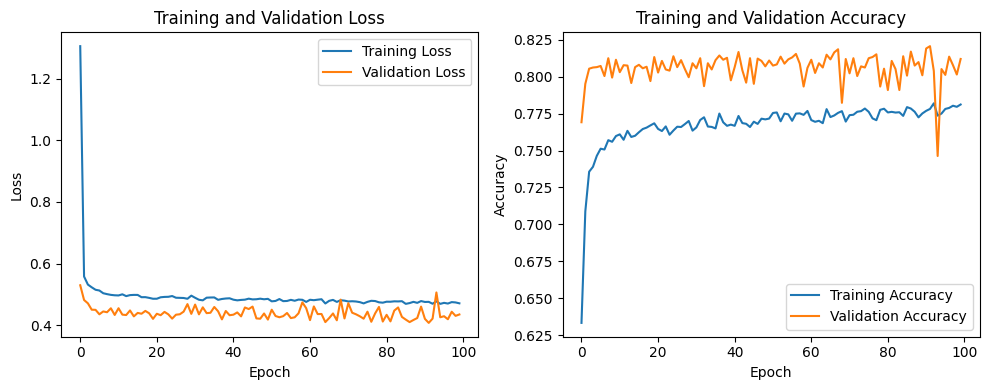

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8209 - loss: 0.4331
num_nodes:16,dropout_prob:0.2,lr:0.01,batch_size:128


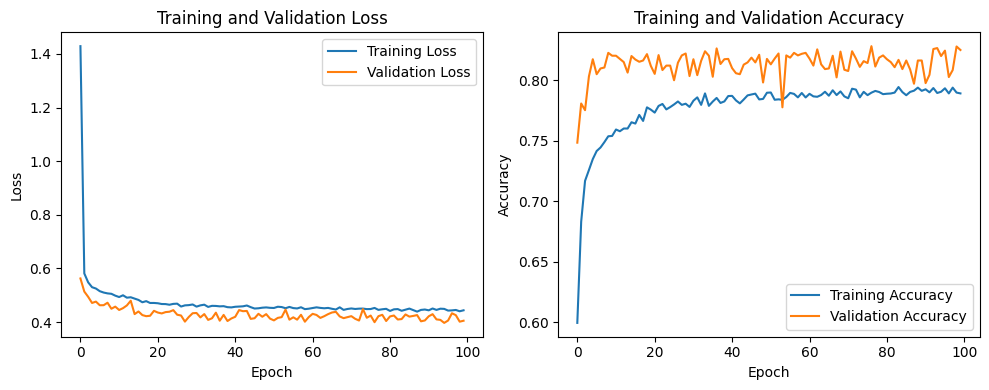

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8232 - loss: 0.4037
num_nodes:16,dropout_prob:0.2,lr:0.005,batch_size:32


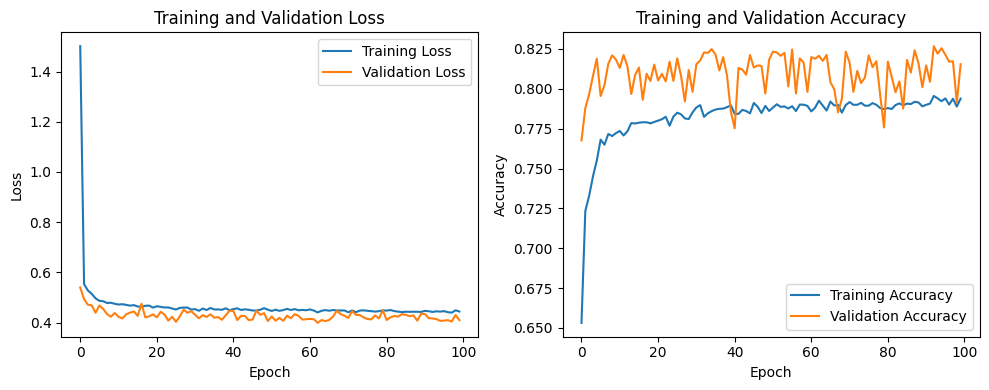

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8221 - loss: 0.4075
num_nodes:16,dropout_prob:0.2,lr:0.005,batch_size:64


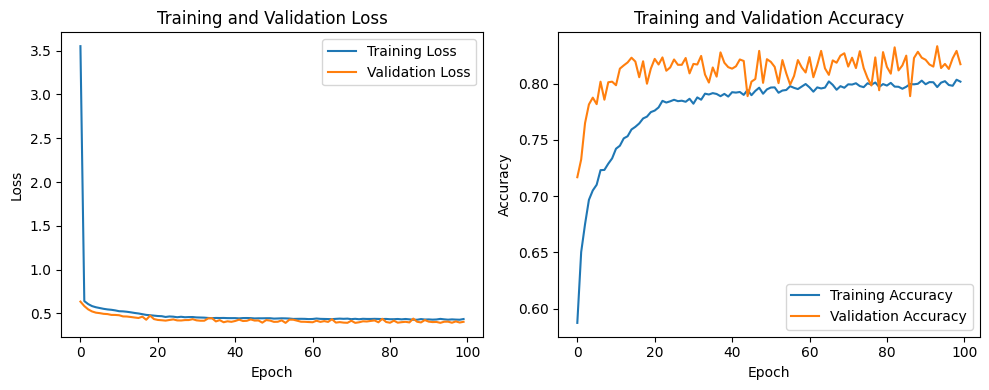

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8181 - loss: 0.4051
num_nodes:16,dropout_prob:0.2,lr:0.005,batch_size:128


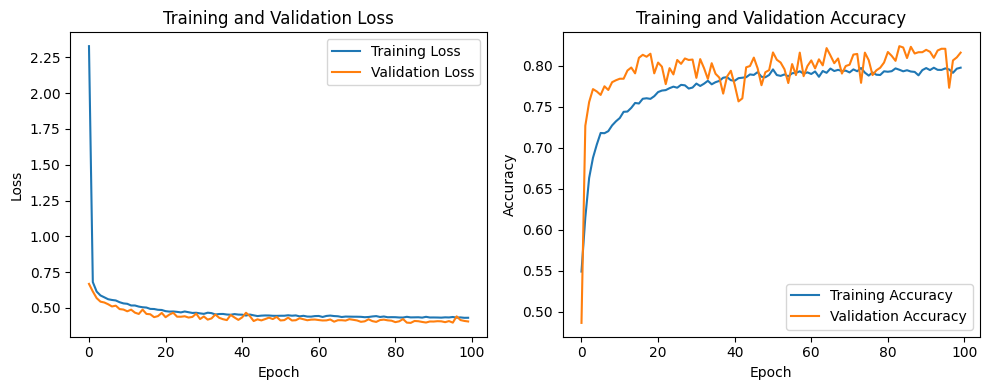

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8110 - loss: 0.4093
num_nodes:16,dropout_prob:0.2,lr:0.001,batch_size:32


KeyboardInterrupt: 

In [17]:
least_val_loss=float('inf')
least_val_model=None
epochs =100
for num_nodes in[16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f'num_nodes:{num_nodes},dropout_prob:{dropout_prob},lr:{lr},batch_size:{batch_size}')
        model,history=train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss=model.evaluate(X_valid,y_valid)[0]
        if val_loss<least_val_loss:
          least_val_loss=val_loss
          least_val_model=model

In [18]:
y_pred=least_val_model.predict(X_test)
y_pred=np.round(y_pred).flatten()  #y_pred=(y_pred>0.5).astype(int).reshape(-1,)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [19]:
y_pred

array([1., 0., 1., ..., 1., 1., 1.], dtype=float32)

In [22]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1300
           1       0.89      0.88      0.89      2504

    accuracy                           0.85      3804
   macro avg       0.83      0.84      0.83      3804
weighted avg       0.85      0.85      0.85      3804

[[1025  275]
 [ 296 2208]]
0.849894847528917
